## General Social Survey

This Jupyter Notebook is going to be filled with some visualizations using data retrieved from the General Social Survey (http://www.gss.norc.org/). With his notebook my goal was to try to find some interesting patterns and create interesting visualizations. For the most part I will be looking at "job" related data. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
gss = pd.read_spss("GSS2018.sav")

In [3]:
gss.head(10)

,ABANY,ABDEFECT,ABFELEGL,ABHELP1,ABHELP2,ABHELP3,ABHELP4,ABHLTH,ABINSPAY,ABMEDGOV1,...,XMARSEX,XMARSEX1,XMOVIE,XNORCSIZ,YEAR,YEARSJOB,YEARSUSA,YEARVAL,YOUSUP,ZODIAC
0,NO,YES,NaN,Yes,Yes,Yes,Yes,YES,People should be able,The government should decide,...,ALWAYS WRONG,ALWAYS WRONG,NaN,"UNINC,MED CITY",2018.0,1,NaN,NaN,45.0,VIRGO
1,YES,YES,It depends,No,No,No,No,YES,People should not be able,NaN,...,ALWAYS WRONG,NaN,NO,"UNINC,MED CITY",2018.0,NaN,NaN,NaN,NaN,AQUARIUS
2,NaN,NaN,NaN,Yes,No,Yes,Yes,NaN,People should not be able,A woman and her medical professional should de...,...,NaN,ALWAYS WRONG,NO,"UNINC,MED CITY",2018.0,15,NaN,NaN,3.0,ARIES
3,NaN,NaN,Should,Yes,Yes,Yes,Yes,NaN,People should be able,NaN,...,NaN,NaN,NO,"UNINC,MED CITY",2018.0,25,NaN,NaN,10.0,ARIES
4,NO,YES,NaN,No,No,No,Yes,YES,People should not be able,NaN,...,ALWAYS WRONG,NaN,NO,"UNINC,MED CITY",2018.0,NaN,NaN,NaN,NaN,CANCER
5,YES,YES,Should,Yes,Yes,Yes,Yes,YES,People should be able,NaN,...,ALMST ALWAYS WRG,ALMOST ALWAYS WRONG,NaN,"UNINC,MED CITY",2018.0,NaN,NaN,NaN,NaN,SCORPIO
6,YES,YES,It depends,Yes,No,Yes,Yes,YES,People should be able,NaN,...,ALWAYS WRONG,NaN,NO,"CITY,50-250000",2018.0,2,NaN,NaN,NaN,LEO
7,NO,YES,NaN,Yes,No,Yes,Yes,YES,NaN,A woman and her medical professional should de...,...,ALWAYS WRONG,NaN,NO,"CITY,50-250000",2018.0,5,NaN,NaN,14.0,PISCES
8,NaN,NaN,It depends,Yes,Yes,Yes,Yes,NaN,People should be able,A woman and her medical professional should de...,...,NaN,ALWAYS WRONG,NO,"CITY,50-250000",2018.0,6-11.9 MONTHS,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,Yes,No,No,Yes,NaN,People should not be able,NaN,...,NaN,NaN,NO,"SUBURB, MED CITY",2018.0,11,NaN,NaN,NaN,SCORPIO


<AxesSubplot:xlabel='JOBSECOK', ylabel='count'>

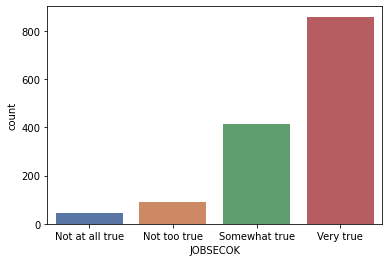

In [4]:
sns.countplot(gss['JOBSECOK'],palette="deep")





In [14]:
for x in gss['JOBSECOK'].unique():
    percentage = gss['JOBSECOK'][gss['JOBSECOK'] == x].count() / gss['JOBSECOK'].count()
    print("Percent True for {}: {}".format(x ,percentage))

Percent True for Somewhat true: 0.29323843416370104
Percent True for nan: 0.0
Percent True for Very true: 0.6113879003558719
Percent True for Not at all true: 0.03202846975088968
Percent True for Not too true: 0.06334519572953737


In [28]:
gss['JOBSECOK']

,JOBSECOK
0,Somewhat true
1,NaN
2,Somewhat true
3,Very true
4,NaN
...,...
2343,Very true
2344,Very true
2345,NaN
2346,NaN


In [27]:
df = gss['JOBSECOK'].dropna()

In [35]:


def percoftot(data,series,hue = False , remove_nan = True, giveData = True):
# A quick way to find the percentages of each unique option in categorical data.

#For example given a choice of 3 colors, red blue and green. We can find the percentages of how many chose each individual color.

#With the "hue" option we could use the same theoretical data set as above, and find the percentages of boys/ girls that choose each individual color.

# The remove nan option is there as NaN's are treated in unique ways in Panda Data Frames. Removing the NaN's is almost always preferred,well at least for this project it will be.

# This will always return a dataframe. 
   
    
    if hue == False:
        if remove_nan == True: 
            df = data[[series]].dropna()
        for x in df[series].unique():
            percentage = df[series][df[series] == x].count() / df[series].count()
            print("Percent True for {}: {}".format(x ,percentage))
            
    else:
        if remove_nan == True: 
            df = data[[series,hue]].dropna()
        for y in data[hue].unique():
            for x in data[series].unique():
                #percentage = data[series][(data[series] == x) & (data[series] == y)].count() /data[series][data[series] == y].count() 
                #print("Percentage True for {} and {} :{}".format(x,y,percentage))
                # percentage of y what that are x 
                
                #print(data[series][(data[series] == x) & (data[hue] == y)].count())
                #print(data[data[hue]==y])
                #print(x,y)
                shcount = df[series][(df[series] == x) & (df[hue] == y)].count()
                hcount = df[hue][df[hue] ==y].count()
                percentage =  df[series][(df[series] == x) & (df[hue] == y)].count()/ df[hue][df[hue] ==y].count()
                print("Percent True for {} in {}: {} / {} = {}".format(x,y,shcount, hcount,percentage))
                

In [40]:
percoftot(gss,'JOBSECOK')




Percent True for Somewhat true: 0.29323843416370104
Percent True for Very true: 0.6113879003558719
Percent True for Not at all true: 0.03202846975088968
Percent True for Not too true: 0.06334519572953737


In [41]:
percoftot(gss,'JOBSECOK','RACE')

Percent True for Somewhat true in WHITE: 281 / 1001 = 0.2807192807192807
Percent True for nan in WHITE: 0 / 1001 = 0.0
Percent True for Very true in WHITE: 627 / 1001 = 0.6263736263736264
Percent True for Not at all true in WHITE: 34 / 1001 = 0.03396603396603397
Percent True for Not too true in WHITE: 59 / 1001 = 0.058941058941058944
Percent True for Somewhat true in BLACK: 81 / 231 = 0.35064935064935066
Percent True for nan in BLACK: 0 / 231 = 0.0
Percent True for Very true in BLACK: 124 / 231 = 0.5367965367965368
Percent True for Not at all true in BLACK: 7 / 231 = 0.030303030303030304
Percent True for Not too true in BLACK: 19 / 231 = 0.08225108225108226
Percent True for Somewhat true in OTHER: 50 / 173 = 0.28901734104046245
Percent True for nan in OTHER: 0 / 173 = 0.0
Percent True for Very true in OTHER: 108 / 173 = 0.6242774566473989
Percent True for Not at all true in OTHER: 4 / 173 = 0.023121387283236993
Percent True for Not too true in OTHER: 11 / 173 = 0.06358381502890173


,RACE,JOBSECOK
0,WHITE,Somewhat true
1,WHITE,NaN
2,WHITE,Somewhat true
3,WHITE,Very true
4,BLACK,NaN
...,...,...
2343,WHITE,Very true
2344,WHITE,Very true
2345,WHITE,NaN
2346,WHITE,NaN


<AxesSubplot:xlabel='JOBSECOK', ylabel='count'>

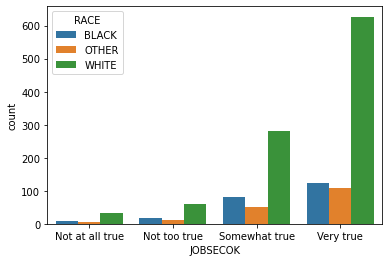

In [7]:
sns.countplot(gss['JOBSECOK'], hue = gss["RACE"])

<AxesSubplot:xlabel='JOBSECOK', ylabel='count'>

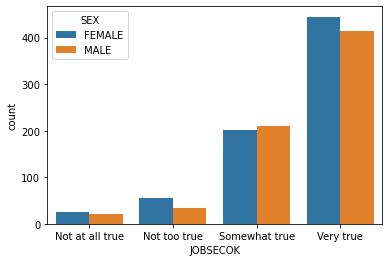

In [9]:
sns.countplot(gss['JOBSECOK'], hue = gss["SEX"])

Percent True for Somewhat true in MALE: 0.19961977186311788
Percent True for Somewhat true in FEMALE: 0.1558641975308642
Percent True for nan in MALE: 0.0
Percent True for nan in FEMALE: 0.0
Percent True for Very true in MALE: 0.3935361216730038
Percent True for Very true in FEMALE: 0.3433641975308642
Percent True for Not at all true in MALE: 0.019011406844106463
Percent True for Not at all true in FEMALE: 0.019290123456790122
Percent True for Not too true in MALE: 0.03136882129277566
Percent True for Not too true in FEMALE: 0.043209876543209874


0.6435361216730038

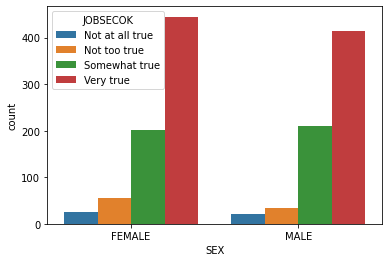

In [63]:
sns.countplot(gss['SEX'], hue = gss["JOBSECOK"])

percoftot(gss,'JOBSECOK',"SEX")


0.19961977186311788 + 0.3935361216730038 + 0.019011406844106463 + 0.03136882129277566


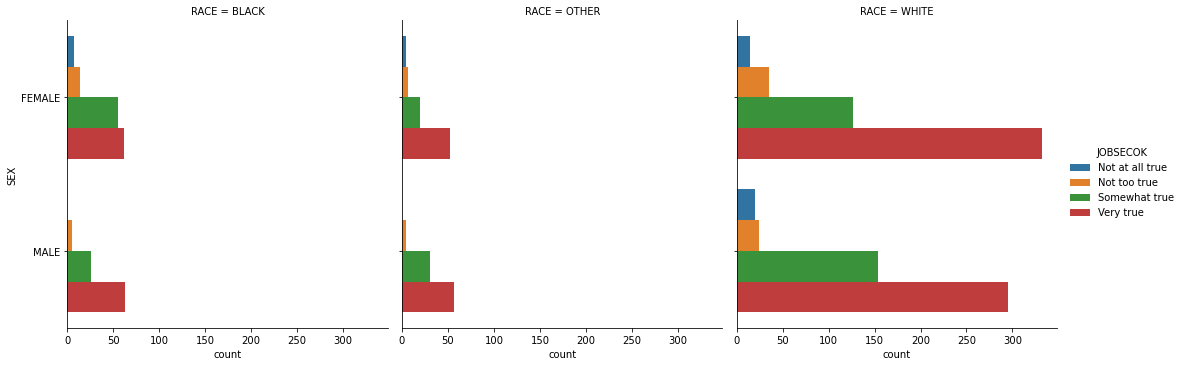

In [13]:
sns.catplot(y = 'SEX', hue = "JOBSECOK", data = gss , col = "RACE", kind = "count")

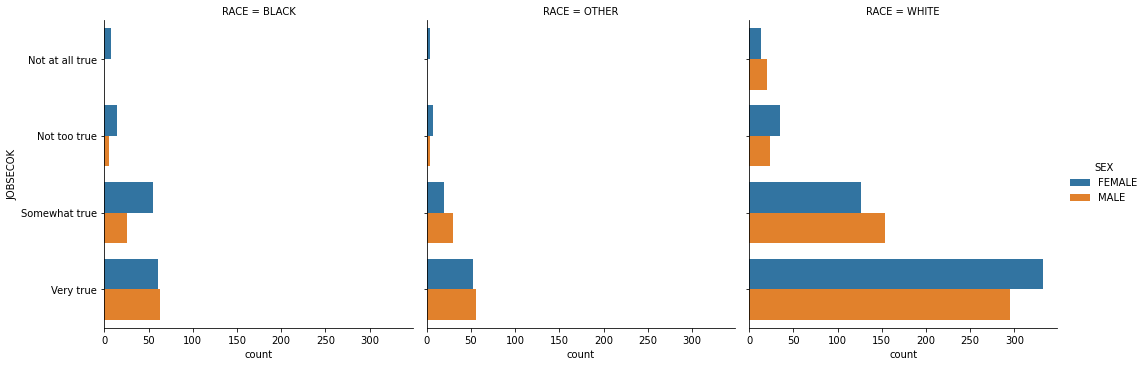

In [56]:
sns.catplot(y = 'JOBSECOK', hue = "SEX", data = gss , col = "RACE", kind = "count")

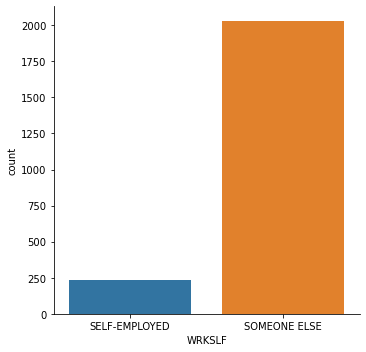

In [57]:
sns.catplot(x = "WRKSLF" , data = gss , kind = "count" )

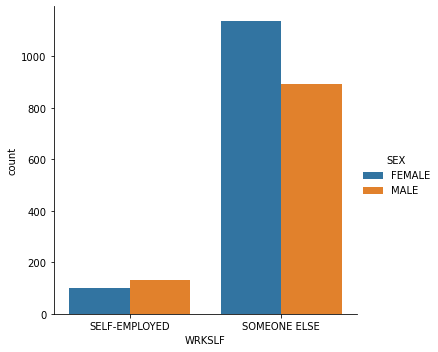

In [58]:
sns.catplot(x = "WRKSLF" , data = gss , kind = "count" , hue = "SEX")

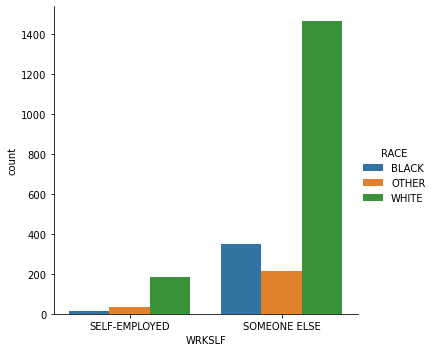

In [59]:
sns.catplot(x = "WRKSLF" , data = gss , kind = "count" , hue = "RACE")

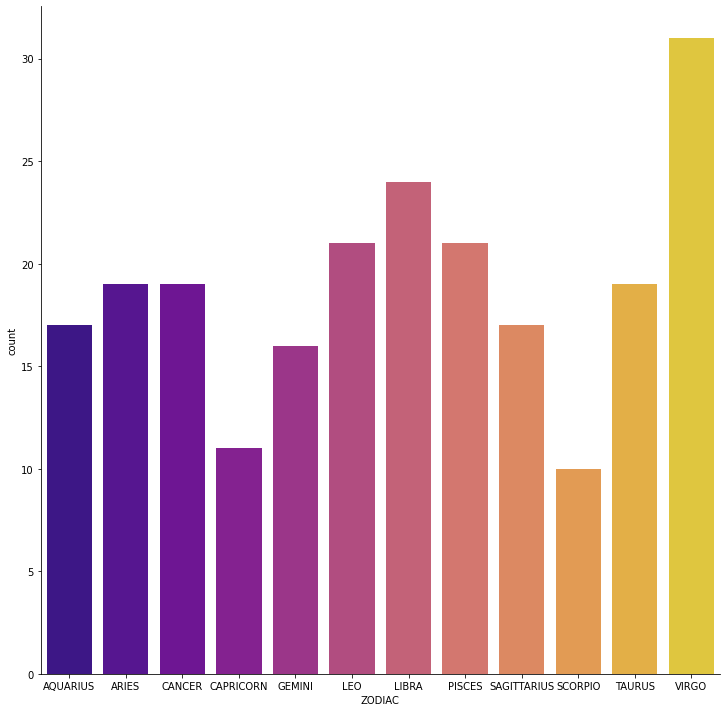

In [62]:
sns.catplot(x = "ZODIAC" , data = gss[gss['WRKSLF'] == "SELF-EMPLOYED"] , kind = "count", height = 10, palette = "plasma" ) 

#Shows which Zodiac Sign works for themselves the most....

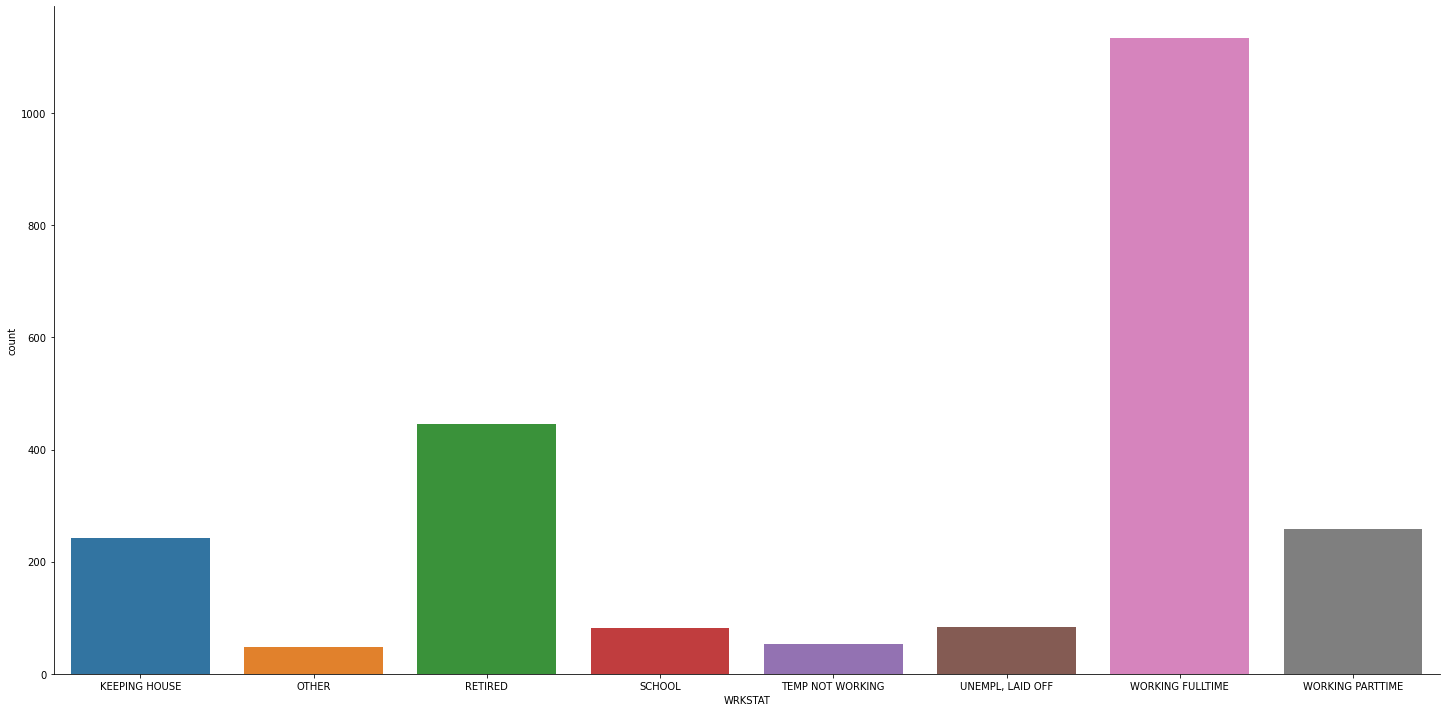

In [70]:
sns.catplot(x = 'WRKSTAT' , data = gss, kind = "count", height = 10,aspect = 2)

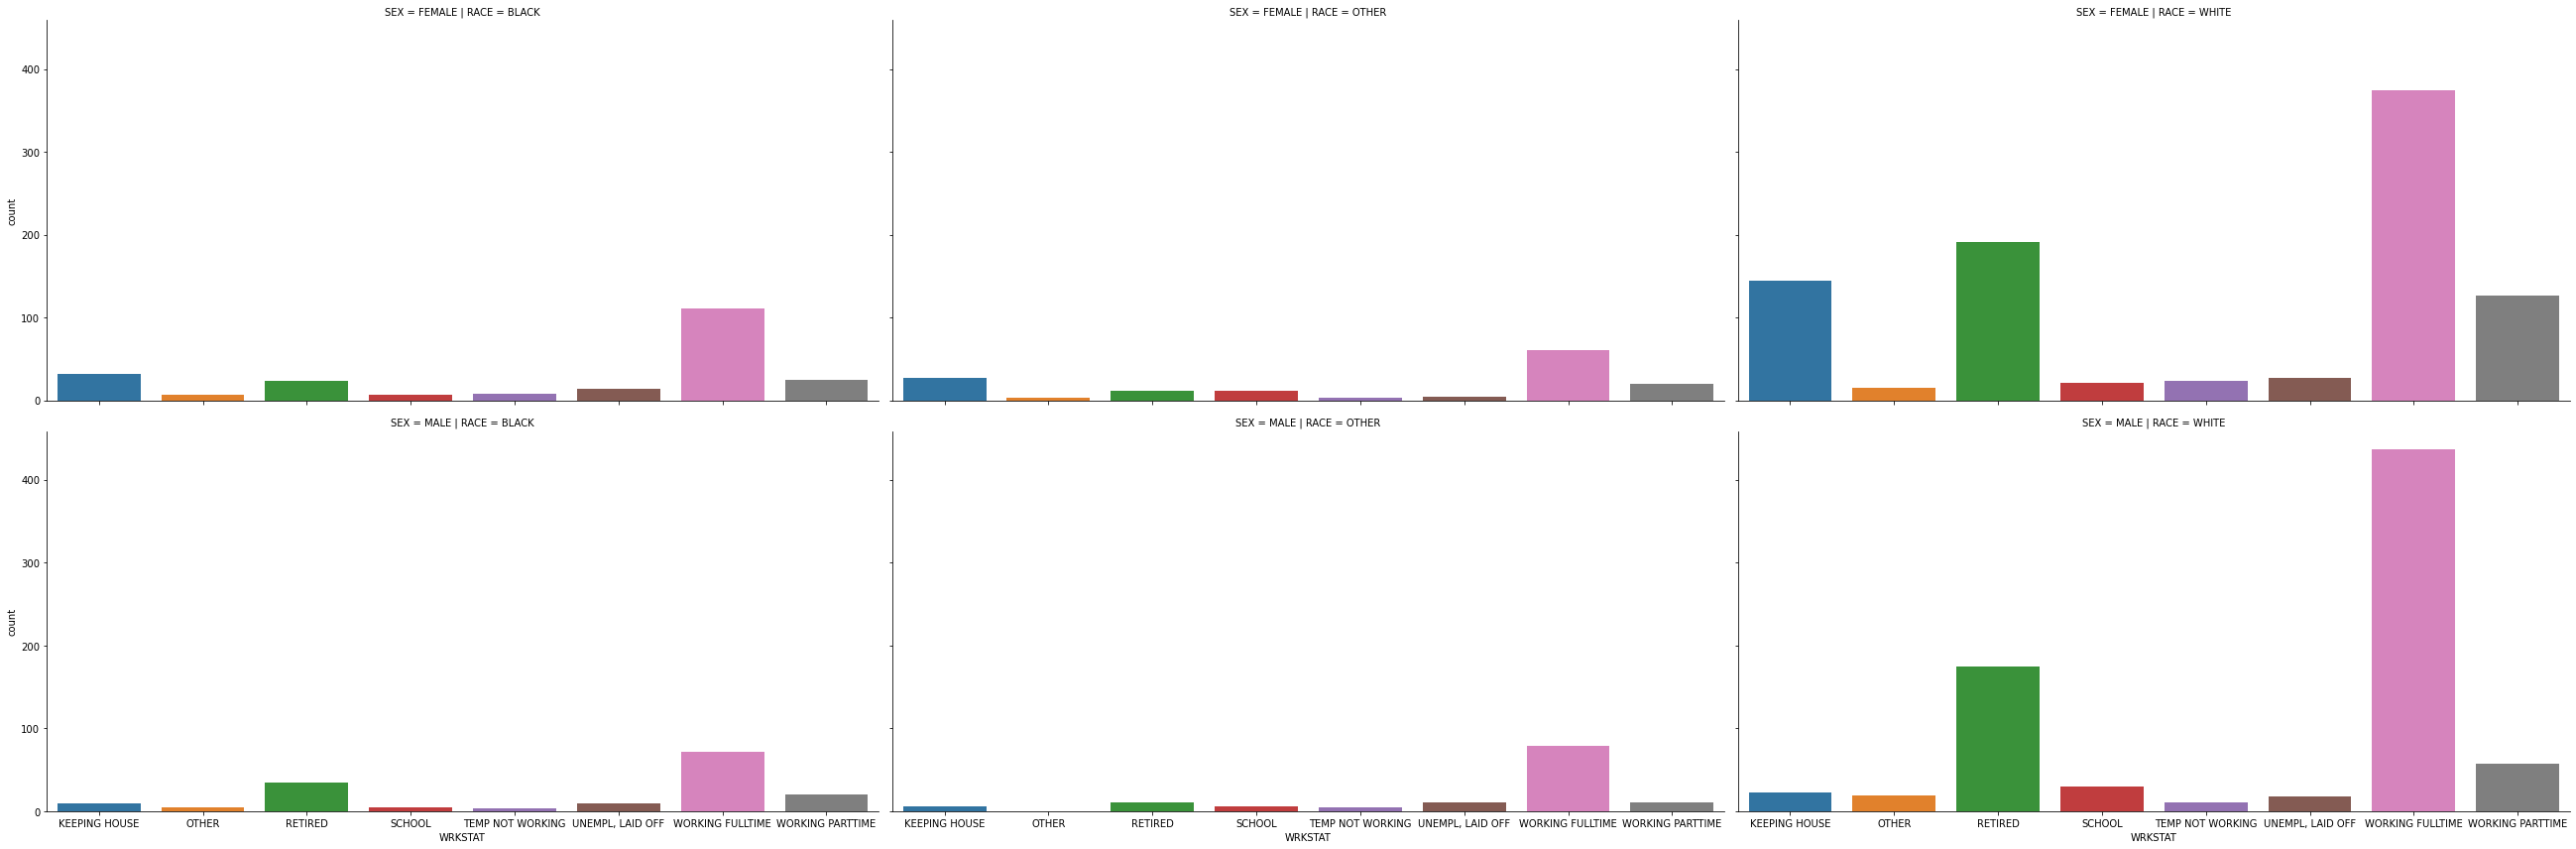

In [74]:
sns.catplot(x = 'WRKSTAT' , data = gss, kind = "count", height = 6,aspect = 2, row = "SEX", col = "RACE")